# Making a Parametric Star Formation Metallicity History

The core element of the parametric modelling in `synthesizer` is the star formation and metal enrichment history (SFZH) object. This contains a 2D grid describing the star formation in bins of age and metallicity. 

This could be defined explicitly, could be generated by an outside program (e.g. a semi-analytical model), but the most common implementation will be to use one of `synthesizer`'s built-in methods to define it. 

In this example we'll explore the latter approach.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from unyt import yr, Myr

In [2]:
from synthesizer.parametric.sfzh import SFH, ZH, generate_sfzh, generate_sfzh_from_array

Define a age and metallicity grid. In normal useage the assumed grid is the one native to the chose SPS grid. 

*Ultimately `synthesizer` will automatically convert arbitrary SFZHs to the SPS grid.* 

In [3]:
log10ages = np.arange(6., 10.5, 0.1) # log10(age/yr)
log10metallicities = np.arange(-5., -1.5, 0.25)
metallicities = 10**log10metallicities

First we are going to generate a SZFH using just a SFH and a single metallicity. To do this we can use the `generate_sfzh_from_array` function:

In [4]:
sfh = np.ones(len(log10ages))
Z = 0.01
sfzh = generate_sfzh_from_array(log10ages, metallicities, sfh, Z)

Like other objects generated by `synthesizer` we can inspect an object by simply printing it:

In [5]:
print(sfzh)

----------
SUMMARY OF BINNED SFZH
median age: 158.49 Myr
mean age: 2713.93 Myr
mean metallicity: 0.0100
----------



A SFZH object also has a built-in method to produce a simple plot:

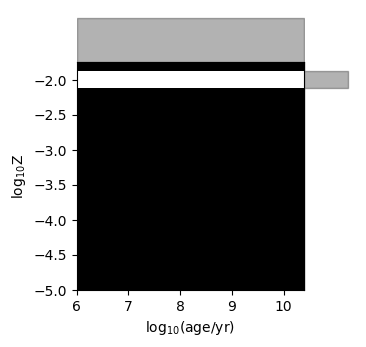

(45, 14)


In [6]:
sfzh.plot()
print(sfzh.sfzh.shape)

`synthesizer` has available a range of different methods for building star formation and metal enrichment histories.

For example, there is a function for defining a constant metallicity history:

In [7]:
Z_p = {'log10Z': -2.5}  # can also use linear metallicity e.g. {'Z': 0.01}
Zh = ZH.deltaConstant(Z_p)
print(Zh)  # print summary

----------
SUMMARY OF PARAMETERISED METAL ENRICHMENT HISTORY
<class 'synthesizer.parametric.sfzh.ZH.deltaConstant'>
log10Z: -2.5
----------



There are also functions to build star formation histories:

*TO DO: add a method to print the available parameterisations*

In [8]:
sfh_p = {'duration': 100 * Myr}
sfh = SFH.Constant(sfh_p)  # constant star formation
print(sfh)  # print summary

----------
SUMMARY OF PARAMETERISED STAR FORMATION HISTORY
<class 'synthesizer.parametric.sfzh.SFH.Constant'>
duration: 100 Myr
median age: 50.00 Myr
mean age: 50.00 Myr
----------



We can combine these functions describing the star formation history and metallicity history individually to produce a SFZH object:

----------
SUMMARY OF BINNED SFZH
median age: 50.12 Myr
mean age: 50.01 Myr
mean metallicity: 0.0032
----------



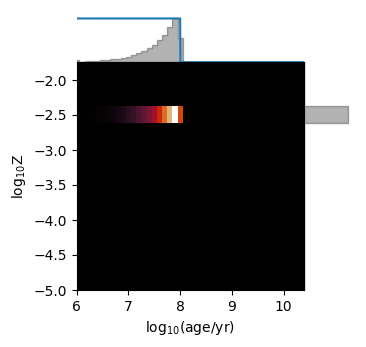

(<Figure size 350x350 with 3 Axes>,
 <Axes: xlabel='$\\rm log_{10}(age/yr)$', ylabel='$\\rm log_{10}Z$'>)

In [9]:

constant = generate_sfzh(log10ages, metallicities, sfh, Zh)
print(constant)  # print summary of the star formation history
constant.plot()

This shows an exponential SFH instead of a constant SFH:

----------
SUMMARY OF PARAMETERISED STAR FORMATION HISTORY
<class 'synthesizer.parametric.sfzh.SFH.TruncatedExponential'>
tau: 100 Myr
max_age: 200 Myr
median age: 56.00 Myr
mean age: 68.20 Myr
----------

----------
SUMMARY OF BINNED SFZH
median age: 63.10 Myr
mean age: 68.54 Myr
mean metallicity: 0.0032
----------



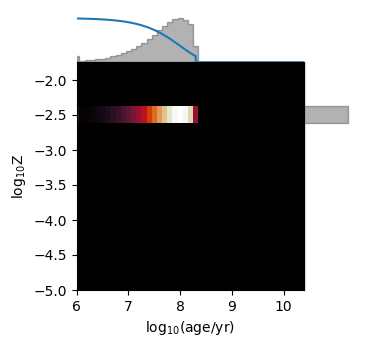

(<Figure size 350x350 with 3 Axes>,
 <Axes: xlabel='$\\rm log_{10}(age/yr)$', ylabel='$\\rm log_{10}Z$'>)

In [10]:
sfh_p = {'tau': 100 * Myr, 'max_age': 200 * Myr}
sfh = SFH.TruncatedExponential(sfh_p)  # constant star formation
print(sfh)  # print summary of the star formation history
exponential = generate_sfzh(log10ages, metallicities, sfh, Zh)
print(exponential)  # print summary of the star formation history
exponential.plot()

We can also combine individual SFZH objects together to produce more complicated star formation and metal enrichment histories:

----------
SUMMARY OF BINNED SFZH
median age: 50.12 Myr
mean age: 59.27 Myr
mean metallicity: 0.0032
----------



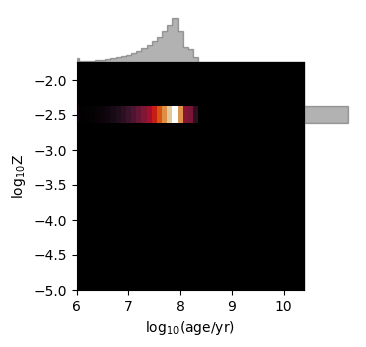

(<Figure size 350x350 with 3 Axes>,
 <Axes: xlabel='$\\rm log_{10}(age/yr)$', ylabel='$\\rm log_{10}Z$'>)

In [11]:

combined = constant + exponential
print(combined)  # print summary of the star formation history
combined.plot()